Created by Wanyu Xu, Sep 26

Edited by Yuecheng Wang, Sep 27

In [1]:
import pandas as pd
import os
import re
import numpy as np
import json

import sys
current_dir = os.getcwd()
scripts_path = os.path.join(current_dir, '../../scripts')
sys.path.append(os.path.abspath(scripts_path))
import preprocess_function as process

In [2]:
# Create folder to save dataset
base_dir = '../../data/'
raw_dir = os.path.join(base_dir, 'raw')
curated_dir = os.path.join(base_dir, 'curated')

if not os.path.exists(base_dir):
    os.makedirs(base_dir)

if not os.path.exists(curated_dir):
    os.makedirs(curated_dir)

In [3]:
# read data
df = pd.read_csv(f"{raw_dir}/individual_property_unpreprocessed.csv")

In [4]:
# Load the postcode dictionary from the JSON file
with open(f'{raw_dir}/suburb_to_postcodes.json', 'r') as f:
    postcode_to_suburb = json.load(f)

In [5]:
postcode_to_suburb

{'Albert Park-Middle Park-West St Kilda': [3206, 3182],
 'Armadale': [3143],
 'Carlton North': [3054],
 'Carlton-Parkville': [3053, 3052],
 'CBD-St Kilda Rd': [3000, 3001, 3004],
 'Collingwood-Abbotsford': [3066, 3067],
 'Docklands': [3008],
 'East Melbourne': [3002],
 'East St Kilda': [3183],
 'Elwood': [3184],
 'Fitzroy': [3065],
 'Fitzroy North-Clifton Hill': [3068],
 'Flemington-Kensington': [3031],
 'North Melbourne-West Melbourne': [3051, 3003],
 'Port Melbourne': [3027],
 'Prahran-Windsor': [3181],
 'Richmond-Burnley': [3121],
 'South Melbourne': [3205],
 'South Yarra': [3141],
 'Southbank': [3006],
 'St Kilda': [3182],
 'Toorak': [3142],
 'Balwyn': [3103, 3104],
 'Blackburn': [3130],
 'Box Hill': [3128, 3129],
 'Bulleen-Templestowe-Doncaster': [3105, 3106, 3107, 3108],
 'Burwood-Ashburton': [3125, 3147],
 'Camberwell-Glen Iris': [3124, 3146],
 'Canterbury-Surrey Hills-Mont Albert': [3126, 3125, 3127, 3129],
 'Chadstone-Oakleigh': [3148, 3166, 3167],
 'Clayton': [3168, 3169],
 '

In [6]:
df.head(5)

,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Gov Secondary Distance,Age under 20,...,Library Distance,Park Distance,Tourist Attraction Distance,Grocery Distance,Year,SA2_CODE21,Population,Income,LGA_CODE24,Incidents Recorded
0,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2015,206051128.0,16053.0,62962.60000000009,25900.0,9137.0
1,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2016,206051128.0,16490.0,"65,352",25900.0,9846.0
2,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2017,206051128.0,16500.0,"66,627",25900.0,10465.0
3,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2018,206051128.0,16728.0,"67,518",25900.0,9780.0
4,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.427,0.1886,0.5198,1.6056,2019,206051128.0,17081.0,"68,933",25900.0,9648.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80262 entries, 0 to 80261
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       80262 non-null  object 
 1   Cost                          6174 non-null   float64
 2   Property Type                 80262 non-null  object 
 3   Bedrooms                      80262 non-null  int64  
 4   Bathrooms                     80262 non-null  int64  
 5   Latitude                      80262 non-null  float64
 6   Longitude                     80262 non-null  float64
 7   Closest Gov Secondary School  69862 non-null  object 
 8   Gov Secondary Distance        69862 non-null  object 
 9   Age under 20                  79313 non-null  object 
 10  Age 20-39                     79313 non-null  object 
 11  Age 40-59                     79313 non-null  object 
 12  Age 60+                       79313 non-null  object 
 13  P

# Preprocessing

In [8]:
df.shape

(80262, 28)

# extract 'Suburb'

In [9]:
# Define a function to map Postcode to Suburb using the postcode_to_suburb dictionary
def map_postcode_to_suburb(postcode):
    for suburb, postcodes in postcode_to_suburb.items():
        if postcode in postcodes:
            return suburb
    return None  # Return None if no matching Suburb is found

# Use the apply function to map the Postcode column to the Suburb column
df['Suburb'] = df['Postcode'].apply(map_postcode_to_suburb)

# Display the data with the newly added Suburb column
df.head()

,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Gov Secondary Distance,Age under 20,...,Park Distance,Tourist Attraction Distance,Grocery Distance,Year,SA2_CODE21,Population,Income,LGA_CODE24,Incidents Recorded,Suburb
0,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.1886,0.5198,1.6056,2015,206051128.0,16053.0,62962.60000000009,25900.0,9137.0,Albert Park-Middle Park-West St Kilda
1,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.1886,0.5198,1.6056,2016,206051128.0,16490.0,"65,352",25900.0,9846.0,Albert Park-Middle Park-West St Kilda
2,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.1886,0.5198,1.6056,2017,206051128.0,16500.0,"66,627",25900.0,10465.0,Albert Park-Middle Park-West St Kilda
3,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.1886,0.5198,1.6056,2018,206051128.0,16728.0,"67,518",25900.0,9780.0,Albert Park-Middle Park-West St Kilda
4,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,0.1886,0.5198,1.6056,2019,206051128.0,17081.0,"68,933",25900.0,9648.0,Albert Park-Middle Park-West St Kilda


# Remove unvalid records
- zero value in number of bedrooms or bathrooms

In [10]:
# Remove rows where 'Bedrooms' or 'Bathrooms' columns have a value of 0
df_filtered = df[(df['Bedrooms'] != 0) & (df['Bathrooms'] != 0)]

df_filtered.shape

(80249, 29)

# Simplified data
Clean the following features, only leave numerical values:

'Gov Secondary Distance', 'Age under 20', 'Age 20-39', 'Age 40-59', and 'Age 60+'

In [11]:
df_filtered.iloc[1]

Address                         8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                    NaN
Property Type                                                     Apartment
Bedrooms                                                                  1
Bathrooms                                                                 1
Latitude                                                         -37.847553
Longitude                                                        144.960477
Closest Gov Secondary School                            Albert Park College
Gov Secondary Distance                                          1.2 km away
Age under 20                                                            36%
Age 20-39                                                               15%
Age 40-59                                                               30%
Age 60+                                                                 19%
Postcode    

In [12]:
# Simplified 'Gov Secondary Distance'
# Skip NaN values
# Extract numeric values

# Function to extract the numeric part from 'Gov Secondary Distance', and handle NaN and invalid values
def extract_numeric_distance(value):
    if pd.isna(value):  # Check if the value is NaN
        return None
    match = re.search(r'(\d+\.?\d*)', value)  # Search for the numeric part
    if match:
        return float(match.group(1))  # Return the matched numeric part
    return None  # If no valid numeric value is found, return None

df_filtered['Gov Secondary Distance (numeric)'] = df_filtered['Gov Secondary Distance'].apply(lambda x: extract_numeric_distance(str(x)))
df_filtered.iloc[1]


/var/folders/gv/pbj7gd456sj494dw3tvm283r0000gn/T/ipykernel_29531/1549502023.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Gov Secondary Distance (numeric)'] = df_filtered['Gov Secondary Distance'].apply(lambda x: extract_numeric_distance(str(x)))


Address                             8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                        NaN
Property Type                                                         Apartment
Bedrooms                                                                      1
Bathrooms                                                                     1
Latitude                                                             -37.847553
Longitude                                                            144.960477
Closest Gov Secondary School                                Albert Park College
Gov Secondary Distance                                              1.2 km away
Age under 20                                                                36%
Age 20-39                                                                   15%
Age 40-59                                                                   30%
Age 60+                                 

In [13]:
# Rename numeric columnbs
df_filtered = df_filtered.drop('Gov Secondary Distance', axis=1)
df_filtered = df_filtered.rename(columns={'Gov Secondary Distance (numeric)': 'Gov Secondary Distance'})
df_filtered.iloc[1]

Address                         8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                    NaN
Property Type                                                     Apartment
Bedrooms                                                                  1
Bathrooms                                                                 1
Latitude                                                         -37.847553
Longitude                                                        144.960477
Closest Gov Secondary School                            Albert Park College
Age under 20                                                            36%
Age 20-39                                                               15%
Age 40-59                                                               30%
Age 60+                                                                 19%
Postcode                                                               3206
CBD Distance

In [14]:
# Remove '%' symbol for columns 'Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+'

# List of columns with percentage values
percentage_columns = ['Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+']

# Loop through each column to remove '%' symbol
df_filtered[percentage_columns] = df_filtered[percentage_columns].apply(lambda x: x.str.replace('%', ''))

# Display the updated dataframe
df_filtered.head()


,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Age under 20,Age 20-39,...,Tourist Attraction Distance,Grocery Distance,Year,SA2_CODE21,Population,Income,LGA_CODE24,Incidents Recorded,Suburb,Gov Secondary Distance
0,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.5198,1.6056,2015,206051128.0,16053.0,62962.60000000009,25900.0,9137.0,Albert Park-Middle Park-West St Kilda,1.2
1,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.5198,1.6056,2016,206051128.0,16490.0,"65,352",25900.0,9846.0,Albert Park-Middle Park-West St Kilda,1.2
2,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.5198,1.6056,2017,206051128.0,16500.0,"66,627",25900.0,10465.0,Albert Park-Middle Park-West St Kilda,1.2
3,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.5198,1.6056,2018,206051128.0,16728.0,"67,518",25900.0,9780.0,Albert Park-Middle Park-West St Kilda,1.2
4,"8/90 Hambleton Street, Middle Park VIC 3206",NaN,Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,...,0.5198,1.6056,2019,206051128.0,17081.0,"68,933",25900.0,9648.0,Albert Park-Middle Park-West St Kilda,1.2


# Missing value

In [15]:
# missing value
print("number of missing value in each column：")
print(df_filtered.isnull().sum())

number of missing value in each column：
Address                             0
Cost                            74076
Property Type                       0
Bedrooms                            0
Bathrooms                           0
Latitude                            0
Longitude                           0
Closest Gov Secondary School    10400
Age under 20                      949
Age 20-39                         949
Age 40-59                         949
Age 60+                           949
Postcode                            0
CBD Distance                        0
Train Distance                      0
Electricity Distance                0
Hospital Distance                   0
Library Distance                    0
Park Distance                       0
Tourist Attraction Distance         0
Grocery Distance                    0
Year                                0
SA2_CODE21                         26
Population                         26
Income                             26
LGA_CODE24

In [16]:
# Dropping rows with missing values in columns other than 'Cost', 'Closest Gov Secondary School', and 'Gov Secondary Distance'
df_cleaned = df_filtered.copy()

df_cleaned = df_cleaned.dropna(subset=['SA2_CODE21'])

# Fill missing age with average
age_columns = ['Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+']
for age_column in age_columns:
    df_cleaned[age_column] = pd.to_numeric(df_cleaned[age_column], errors='coerce')
    df_cleaned[age_column] = df_cleaned[age_column].fillna(df_cleaned[age_column].mean())

# Fill missing crime with median
df_cleaned['Incidents Recorded'] = df_cleaned['Incidents Recorded'].fillna(df_cleaned['Incidents Recorded'].median())

# Fill missing school 
df_cleaned['Closest Gov Secondary School'] = df_cleaned['Closest Gov Secondary School'].fillna('No school')

# Fill in a large value for missing distances
df_cleaned['Gov Secondary Distance'] = pd.to_numeric(df_cleaned['Gov Secondary Distance'], errors='coerce')
df_cleaned['Gov Secondary Distance'] = df_cleaned['Gov Secondary Distance'].fillna(df_cleaned['Gov Secondary Distance'].max()*2)


In [17]:
df_cleaned.isnull().sum()

Address                             0
Cost                            74052
Property Type                       0
Bedrooms                            0
Bathrooms                           0
Latitude                            0
Longitude                           0
Closest Gov Secondary School        0
Age under 20                        0
Age 20-39                           0
Age 40-59                           0
Age 60+                             0
Postcode                            0
CBD Distance                        0
Train Distance                      0
Electricity Distance                0
Hospital Distance                   0
Library Distance                    0
Park Distance                       0
Tourist Attraction Distance         0
Grocery Distance                    0
Year                                0
SA2_CODE21                          0
Population                          0
Income                              0
LGA_CODE24                          0
Incidents Re

# Remove Outlier

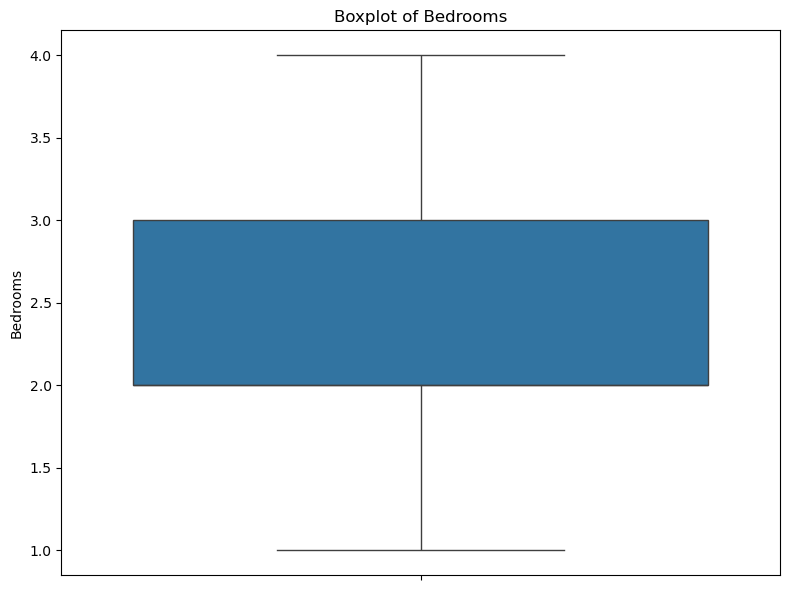

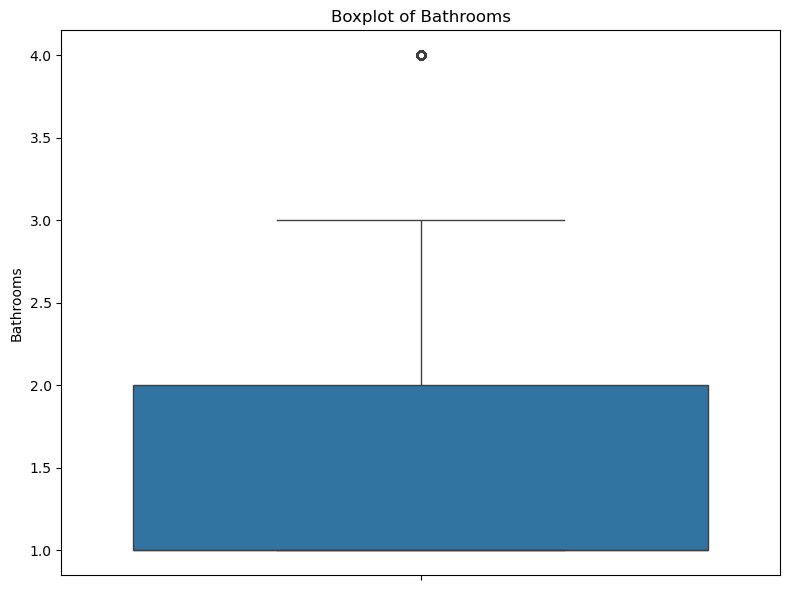

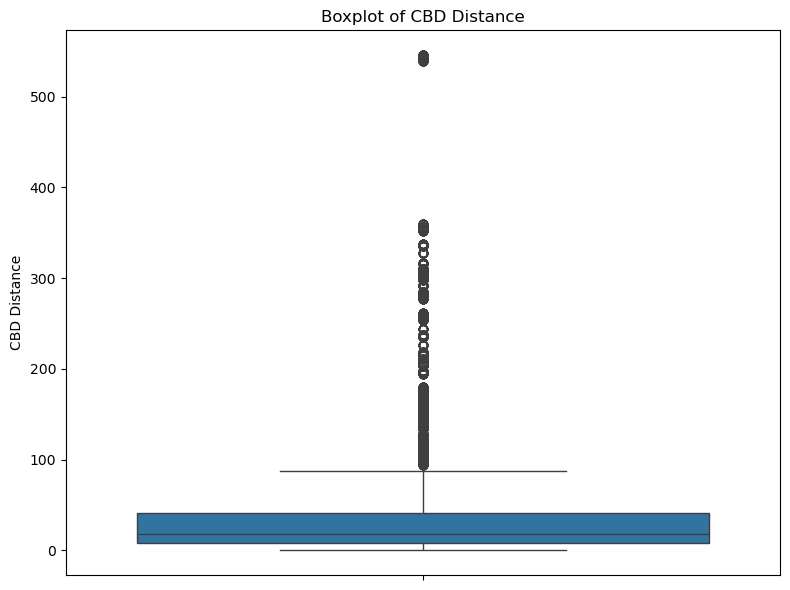

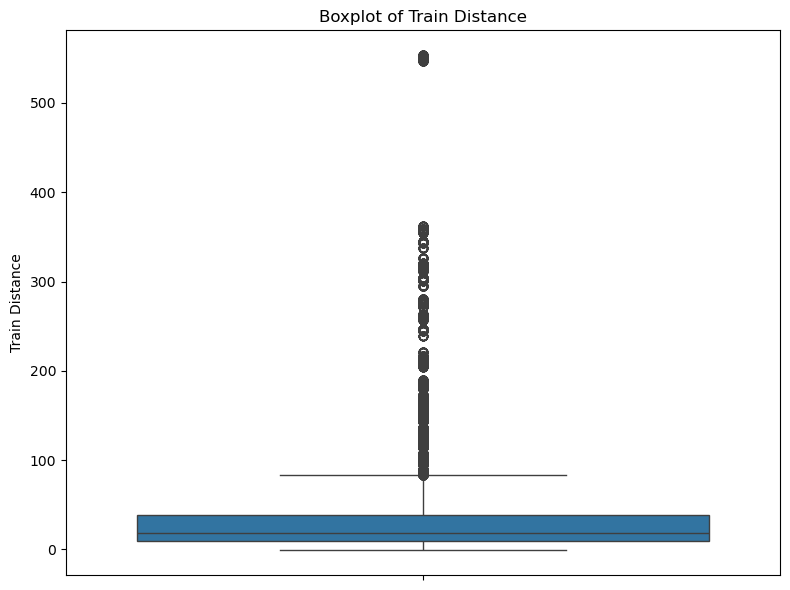

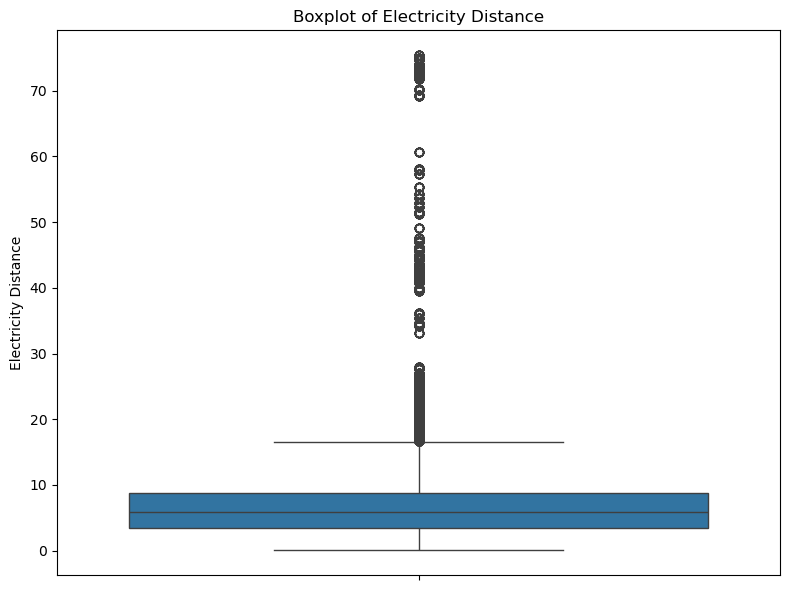

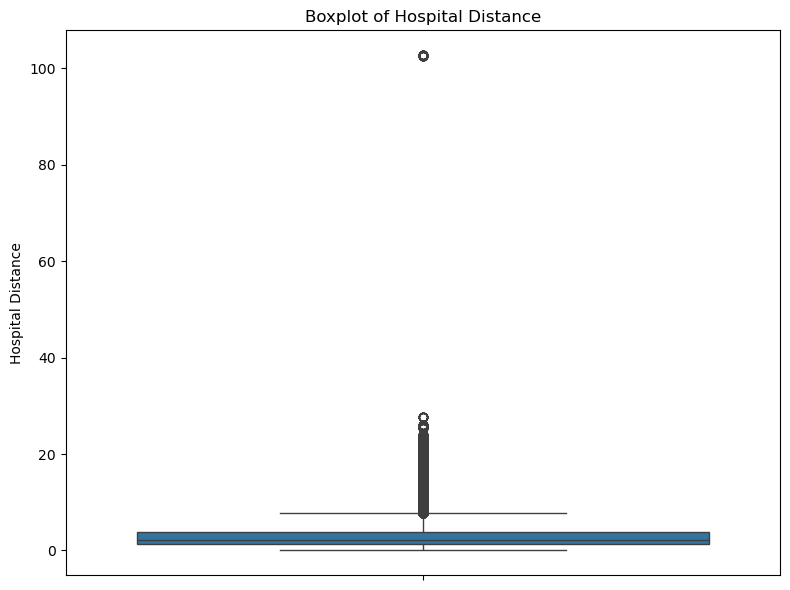

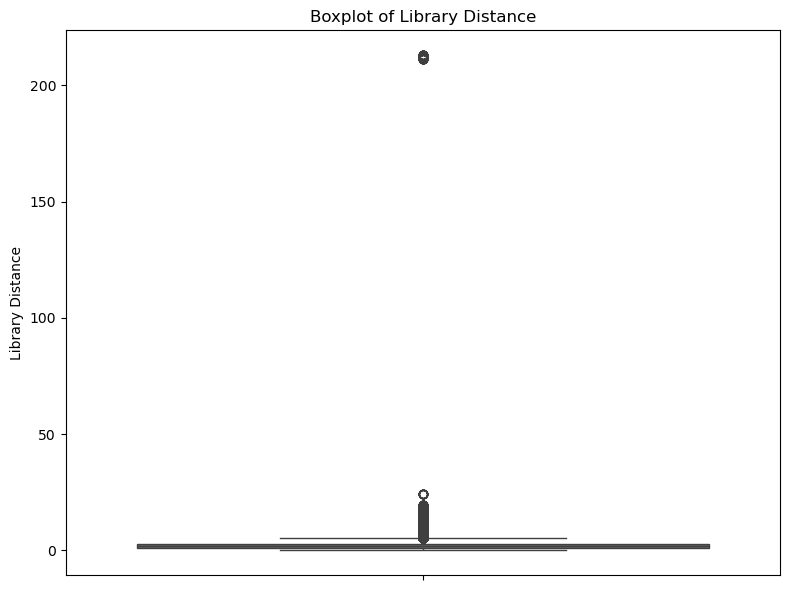

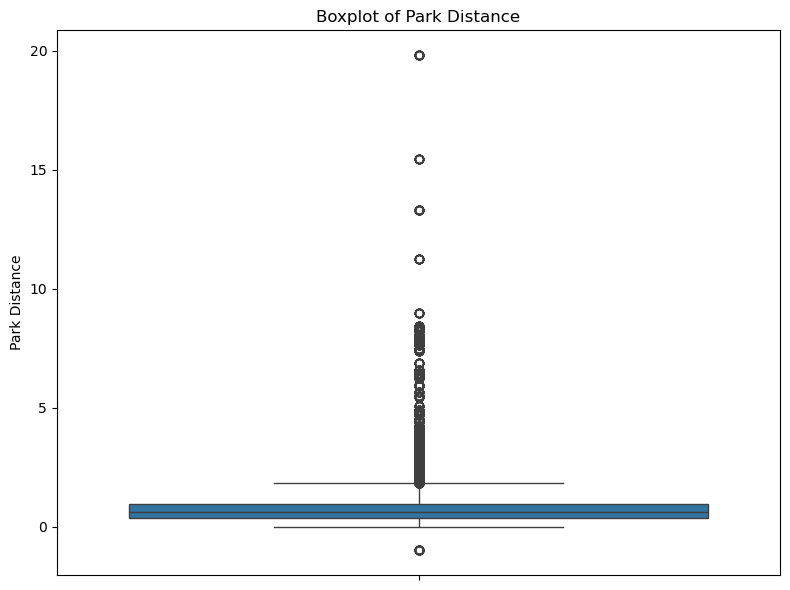

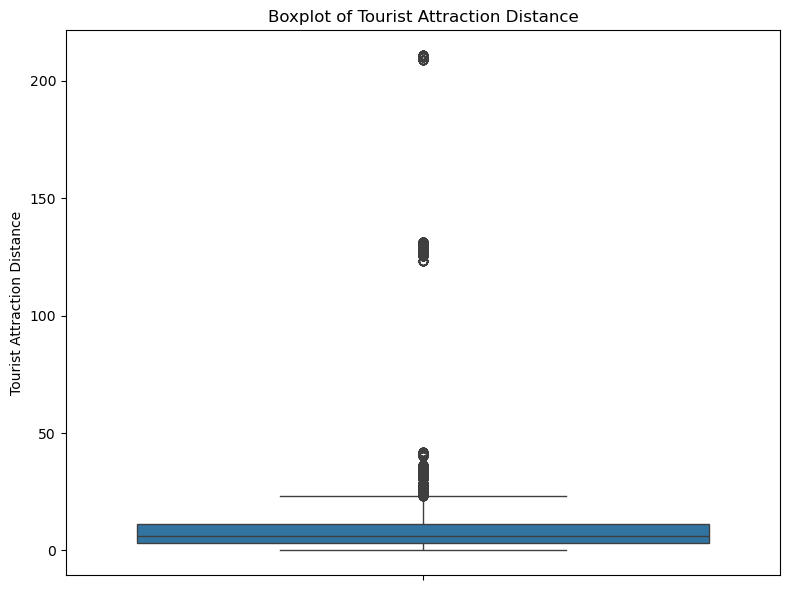

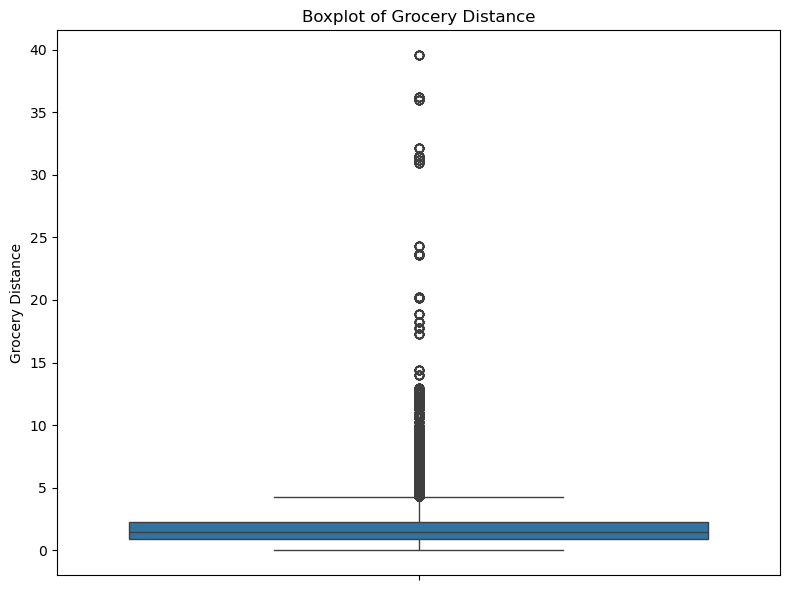

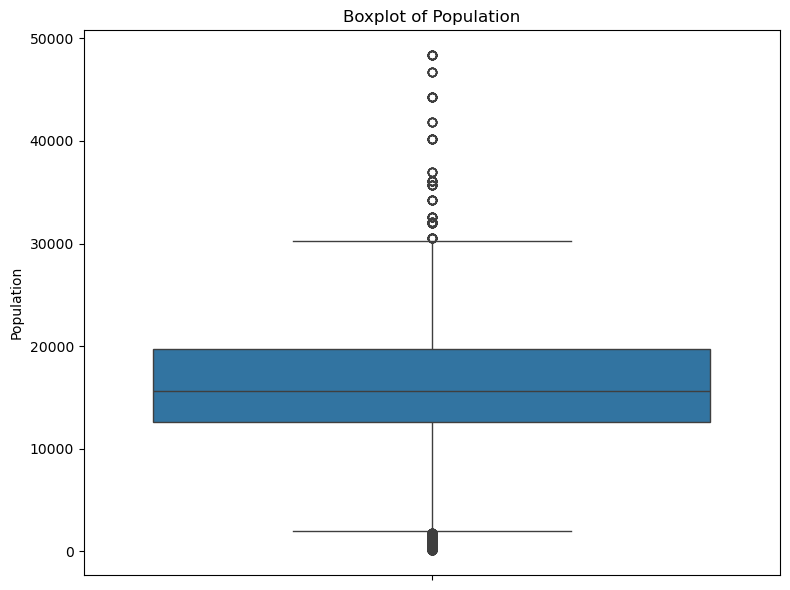

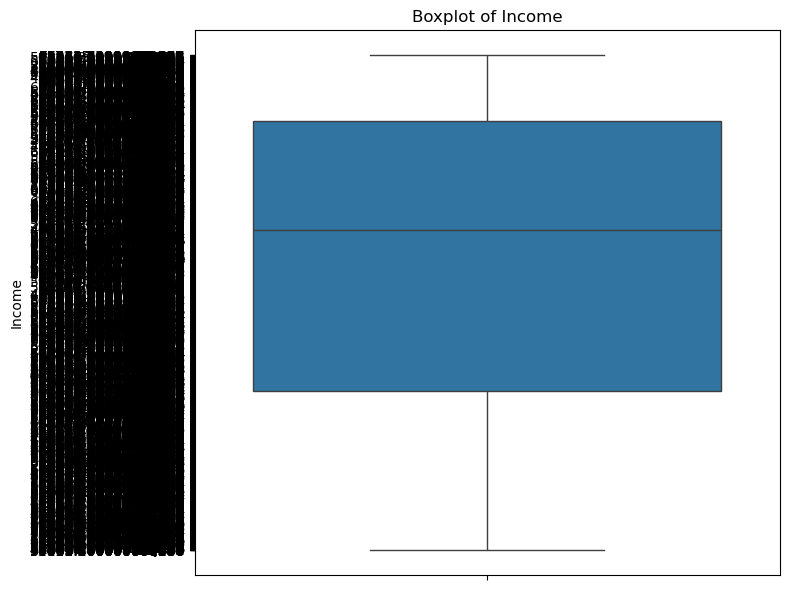

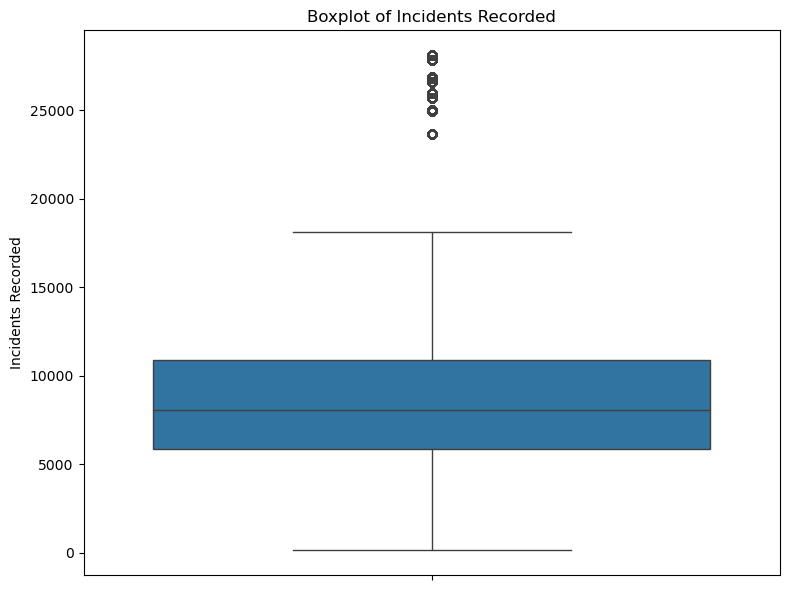

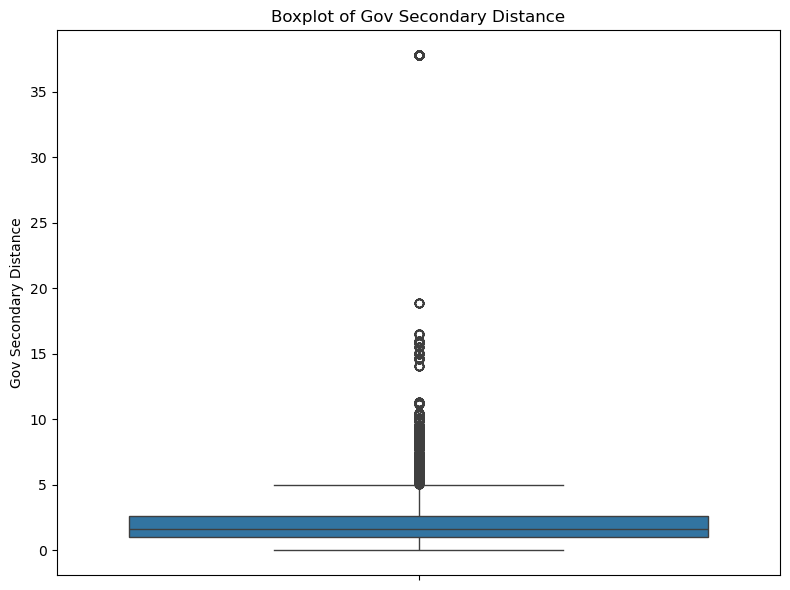

In [18]:
process.plot_boxplots(df_cleaned, 'Bedrooms')
process.plot_boxplots(df_cleaned, 'Bathrooms')
process.plot_boxplots(df_cleaned, 'CBD Distance')
process.plot_boxplots(df_cleaned, 'Train Distance')
process.plot_boxplots(df_cleaned, 'Electricity Distance')
process.plot_boxplots(df_cleaned, 'Hospital Distance')
process.plot_boxplots(df_cleaned, 'Library Distance')
process.plot_boxplots(df_cleaned, 'Park Distance')
process.plot_boxplots(df_cleaned, 'Tourist Attraction Distance')
process.plot_boxplots(df_cleaned, 'Grocery Distance')
process.plot_boxplots(df_cleaned, 'Population')
process.plot_boxplots(df_cleaned, 'Income')
process.plot_boxplots(df_cleaned, 'Incidents Recorded')
process.plot_boxplots(df_cleaned, 'Gov Secondary Distance')

# Convert DataType

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80223 entries, 0 to 80261
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       80223 non-null  object 
 1   Cost                          6171 non-null   float64
 2   Property Type                 80223 non-null  object 
 3   Bedrooms                      80223 non-null  int64  
 4   Bathrooms                     80223 non-null  int64  
 5   Latitude                      80223 non-null  float64
 6   Longitude                     80223 non-null  float64
 7   Closest Gov Secondary School  80223 non-null  object 
 8   Age under 20                  80223 non-null  float64
 9   Age 20-39                     80223 non-null  float64
 10  Age 40-59                     80223 non-null  float64
 11  Age 60+                       80223 non-null  float64
 12  Postcode                      80223 non-null  int64  
 13  CBD Di

In [20]:
# convert to string type
string_columns = ['Address', 'Property Type', 'Closest Gov Secondary School', 'Suburb']
df_cleaned[string_columns] = df_cleaned[string_columns].astype(str)

In [21]:
# convert to float type, and remove ','
columns_to_convert = df_cleaned.columns.difference(string_columns)

df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].replace({',': ''}, regex=True).astype(float)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80223 entries, 0 to 80261
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       80223 non-null  object 
 1   Cost                          6171 non-null   float64
 2   Property Type                 80223 non-null  object 
 3   Bedrooms                      80223 non-null  float64
 4   Bathrooms                     80223 non-null  float64
 5   Latitude                      80223 non-null  float64
 6   Longitude                     80223 non-null  float64
 7   Closest Gov Secondary School  80223 non-null  object 
 8   Age under 20                  80223 non-null  float64
 9   Age 20-39                     80223 non-null  float64
 10  Age 40-59                     80223 non-null  float64
 11  Age 60+                       80223 non-null  float64
 12  Postcode                      80223 non-null  float64
 13  CBD Di

In [22]:
# Save the updated DataFrame if needed
df_cleaned.to_csv("../../data/curated/individual_property_preprocessed.csv", index=False)